In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Simple RNN

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

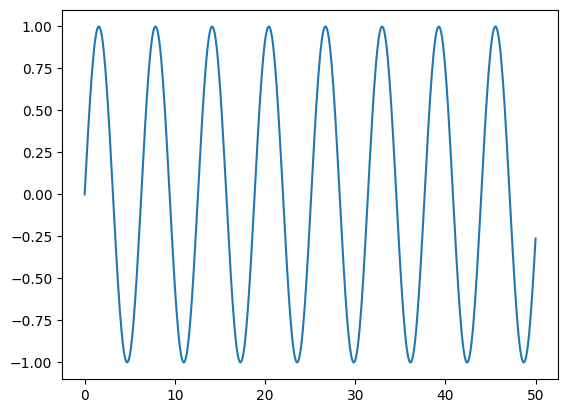

In [3]:
plt.plot(x, y)

In [4]:
df = pd.DataFrame(y, index=x, columns=['sine'])
df.shape

(501, 1)

In [5]:
test_percent = 0.1
test_index = int(np.round(len(df)*test_percent))

train = df.iloc[:len(df)-test_index]
test = df.iloc[len(df)-test_index:]

In [6]:
test.shape
train.shape

(451, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [9]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [10]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [11]:
batch_size = 1
length = 50

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [13]:
n_features = 1
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(generator, epochs=5)

Epoch 1/5
 62/401 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0377

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0103
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6265e-05
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8456e-04
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.7965e-04
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7228e-05


In [16]:
losses = pd.DataFrame(model.history.history)

<Axes: >

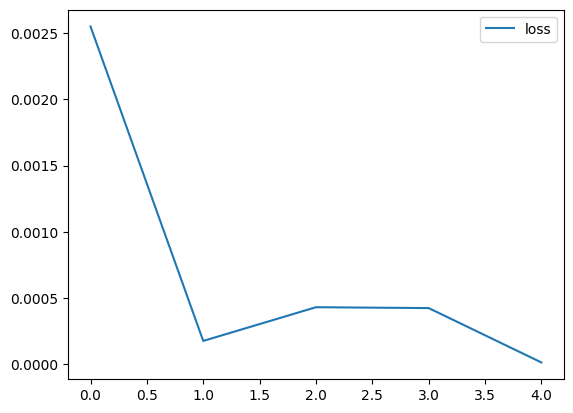

In [17]:
losses.plot()

In [18]:
test_predictions = []
eval_batch = scaled_train[-length:]
current_batch = eval_batch.reshape((1,length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

In [19]:
true_preds = scaler.inverse_transform(test_predictions)

In [20]:
test['preds'] = true_preds

/var/folders/ch/p1mwh9zs19d89x6b4nx5xqy00000gn/T/ipykernel_48639/387886689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['preds'] = true_preds


<Axes: >

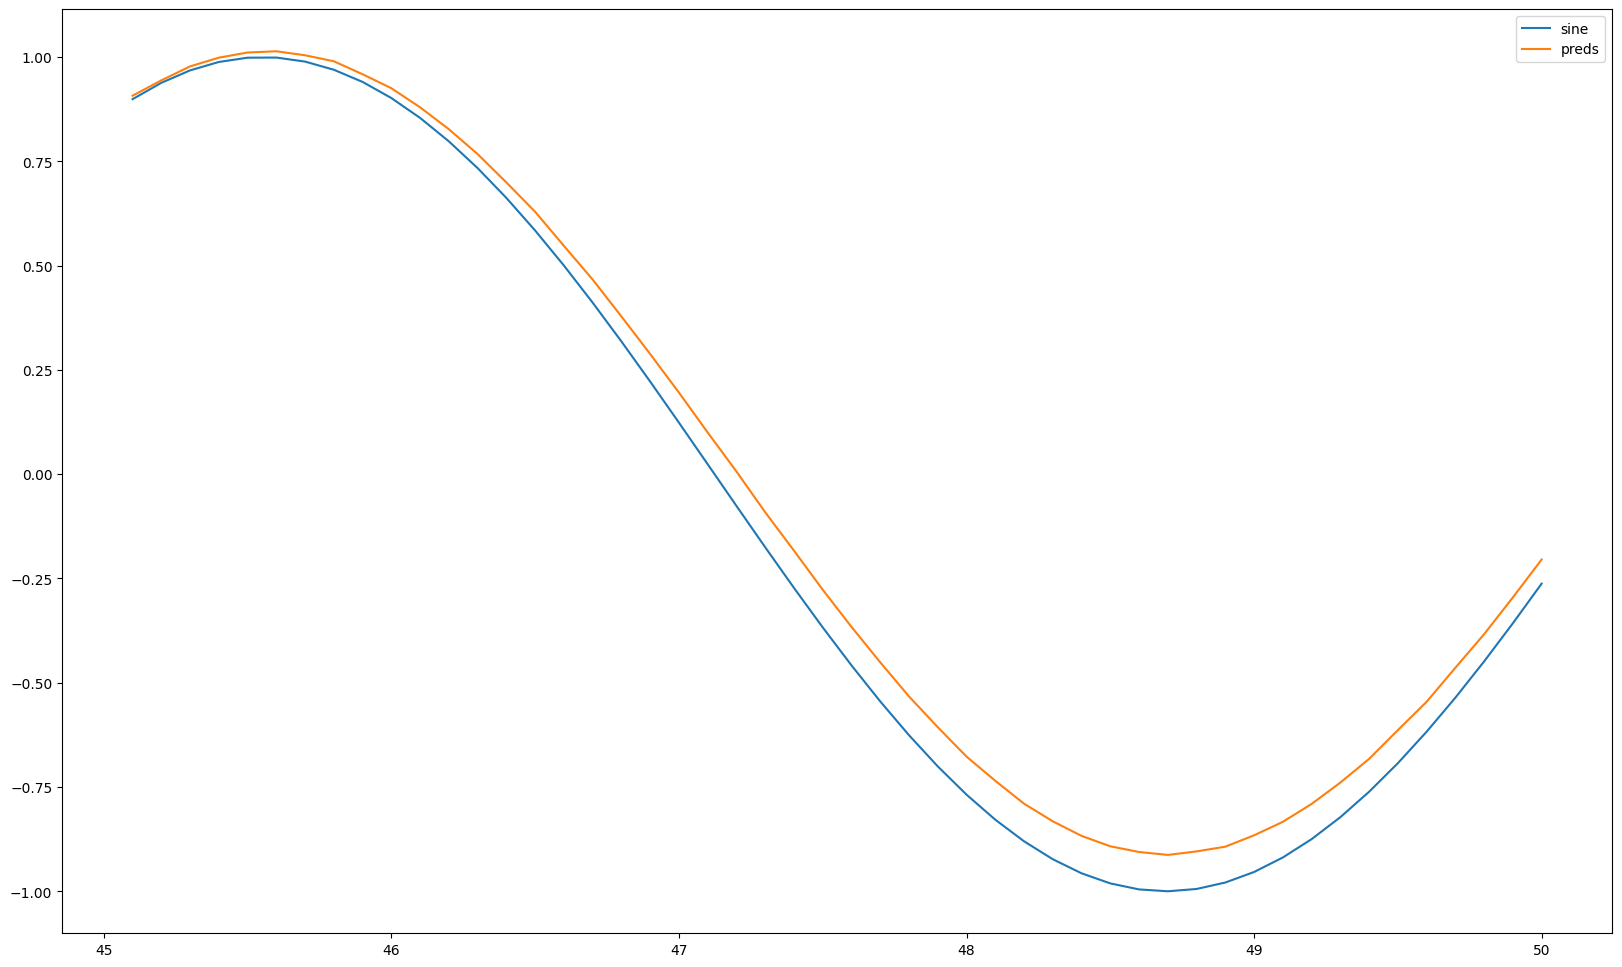

In [21]:
test.plot(figsize=(20,12))

## LSTM

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [24]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [25]:
n_features = 1
ls_model = Sequential()

ls_model.add(LSTM(50, input_shape=(length, n_features)))
ls_model.add(Dense(1))

ls_model.compile(optimizer='adam', loss='mse')

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
ls_model.fit(generator, epochs=20, callbacks=[early_stop], validation_data=validation_generator)

Epoch 1/20
 33/402 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2592

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


402/402 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0542 - val_loss: 1.8401e-04
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.0469e-04 - val_loss: 1.0529e-06
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.9591e-04 - val_loss: 9.3096e-08
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2788e-04 - val_loss: 1.1631e-04
Epoch 5/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9129e-04 - val_loss: 1.9130e-04


In [27]:
ls_test_predictions = []
eval_batch = scaled_train[-length:]
current_batch = eval_batch.reshape((1,length, n_features))

for i in range(len(test)):
    current_pred = ls_model.predict(current_batch)[0]
    ls_test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

/var/folders/ch/p1mwh9zs19d89x6b4nx5xqy00000gn/T/ipykernel_48639/3915013610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Preds'] = ls_true_preds


<Axes: >

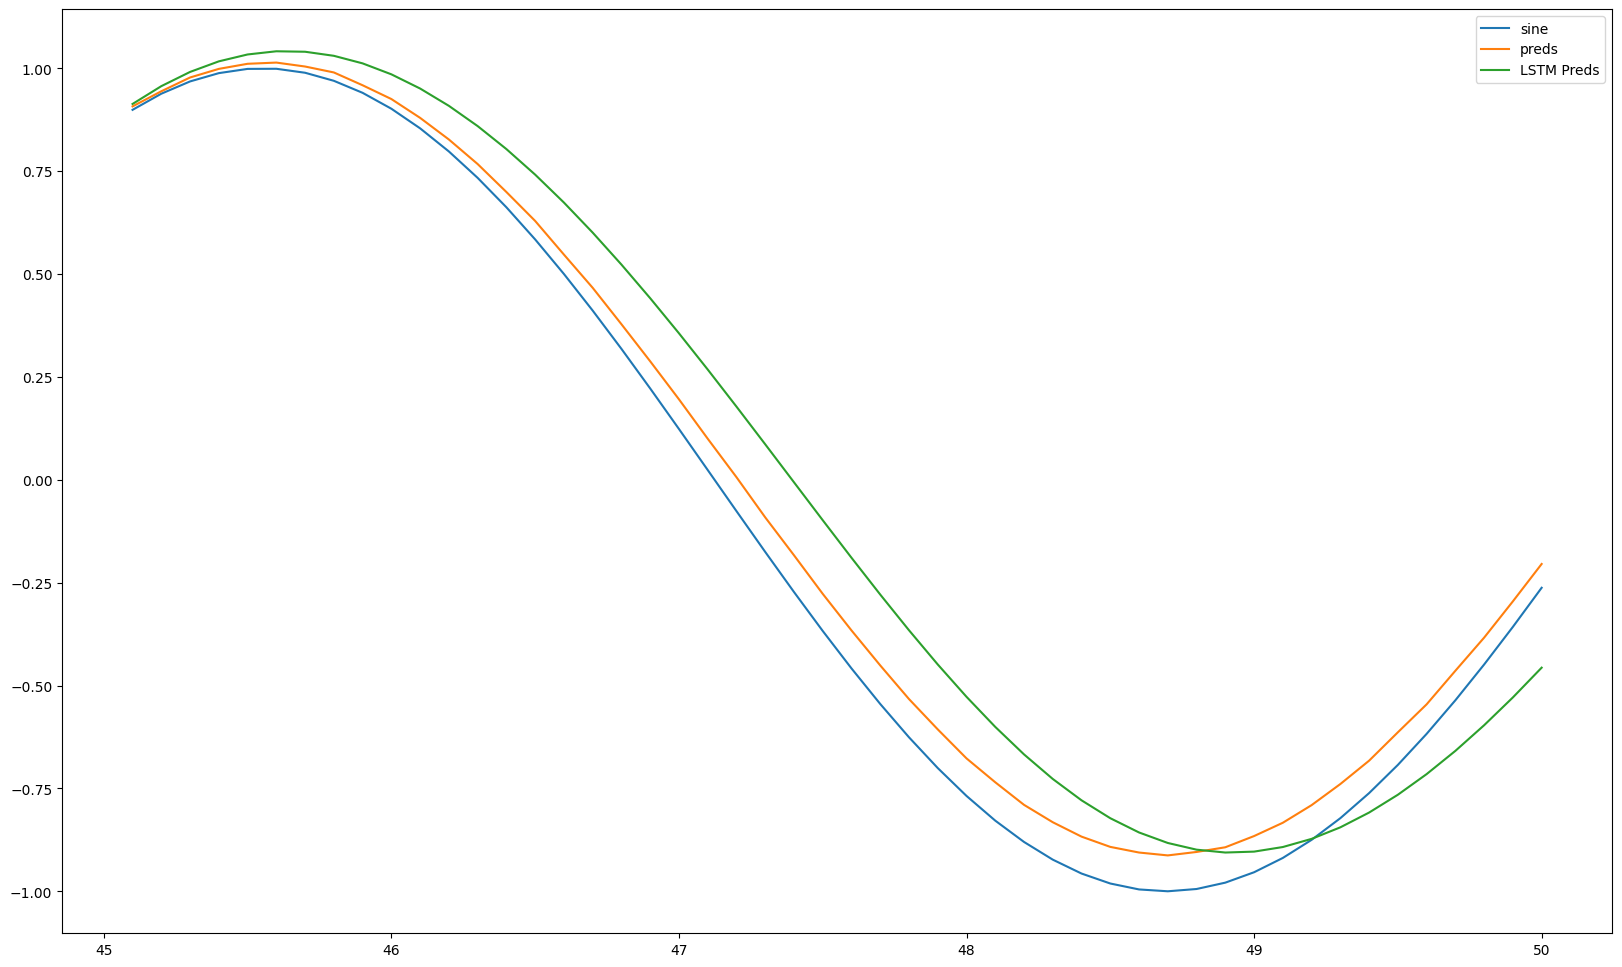

In [28]:
ls_true_preds = scaler.inverse_transform(ls_test_predictions)
test['LSTM Preds'] = ls_true_preds
test.plot(figsize=(20,12))

## Real Time series data

In [29]:
df = pd.read_csv('../DATA/RSCCASN.csv', parse_dates=True, index_col='DATE')
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


<Axes: xlabel='DATE'>

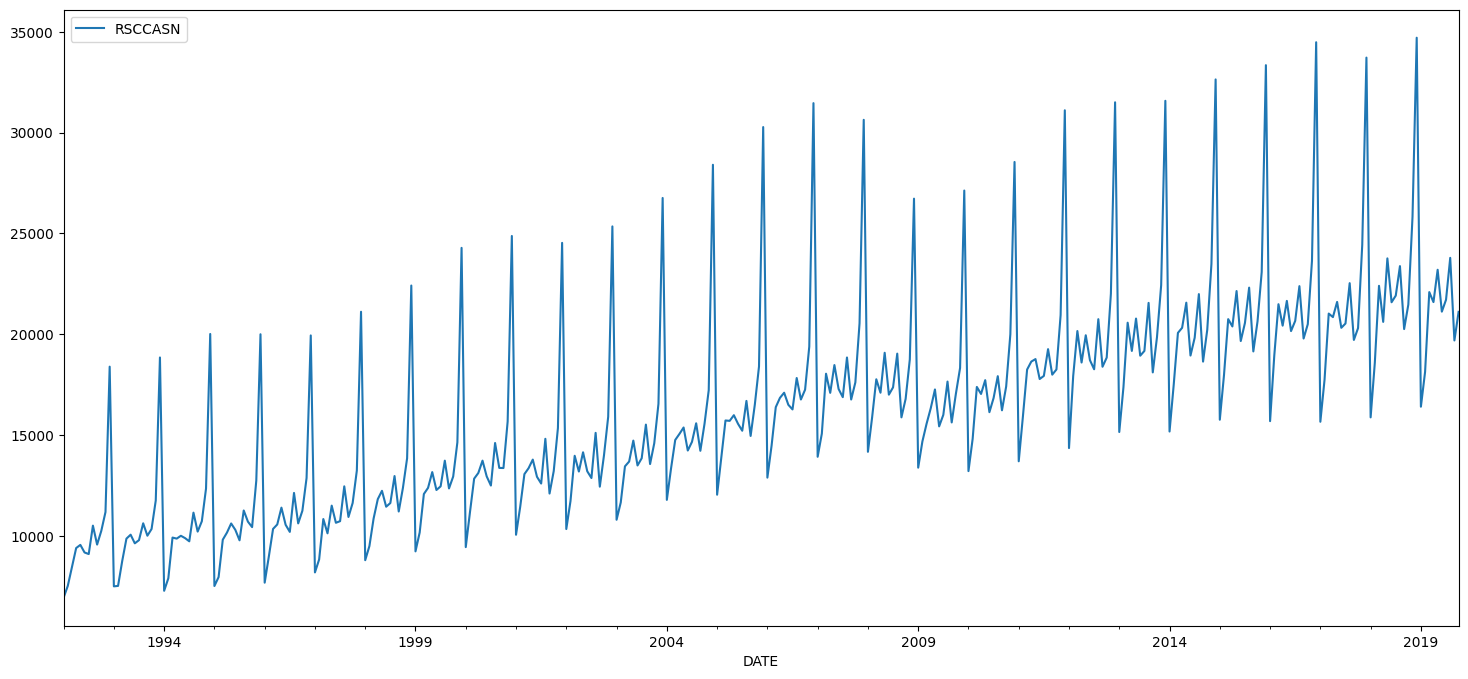

In [30]:
df.plot(figsize=(18,8))

In [31]:
test_ind = np.round(len(df)-0.1*len(df))

In [32]:
test_size = 18
test_ind = len(df) - test_size
test_ind

316

In [33]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
print(train.shape, test.shape)

(316, 1) (18, 1)


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
scaler.fit(train)

MinMaxScaler()

In [36]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [39]:
length = 12
batch_size=1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [40]:
r_model = Sequential()

r_model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
r_model.add(Dense(1))

r_model.compile(optimizer='adam', loss='mse')

In [41]:
r_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [43]:
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

In [44]:
r_model.fit(generator, validation_data=test_generator, epochs=20, callbacks=[early_stop])

Epoch 1/20
 65/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0471  

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0289 - val_loss: 0.0070
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0181 - val_loss: 0.0019
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - val_loss: 0.0128
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064 - val_loss: 8.7896e-04
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - val_loss: 3.6242e-04
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - val_loss: 3.6339e-04
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - val_loss: 2.7931e-04
Epoch 9/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 10/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - val_loss: 3.3141e-04


<Axes: >

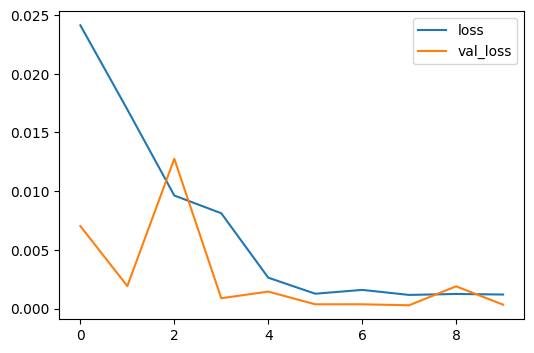

In [46]:
losses = pd.DataFrame(r_model.history.history)
losses.plot(figsize=(6,4))

In [48]:
rts_test_predictions = []
eval_batch = scaled_train[-length:]
current_batch = eval_batch.reshape((1,length, n_features))

for i in range(len(test)):
    current_pred = r_model.predict(current_batch)[0]
    rts_test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [50]:
rts_test_predictions = scaler.inverse_transform(rts_test_predictions)

In [52]:
test['preds'] = rts_test_predictions

/var/folders/ch/p1mwh9zs19d89x6b4nx5xqy00000gn/T/ipykernel_48639/4173605632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['preds'] = rts_test_predictions


<Axes: xlabel='DATE'>

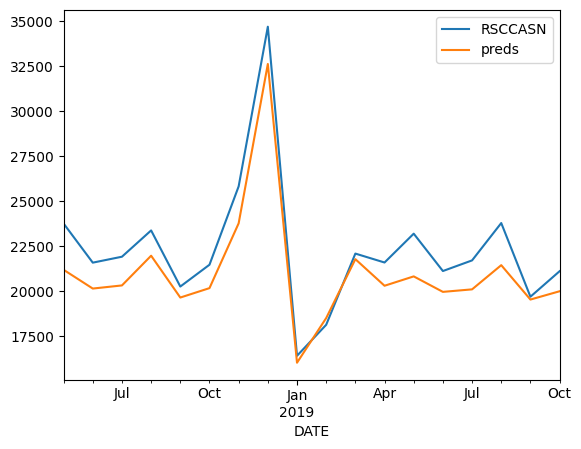

In [54]:
test.plot()

In [55]:
full_scaler = MinMaxScaler()
scaled_data = full_scaler.fit_transform(df)

Epoch 1/20


/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 60/322 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1128  

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0495
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0211
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0195
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0057
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 8/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 9/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025
Epoch 10/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 11/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013
Epoch 12/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1538e-04
Epoch 13/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 14/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014
Epoch 15/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3

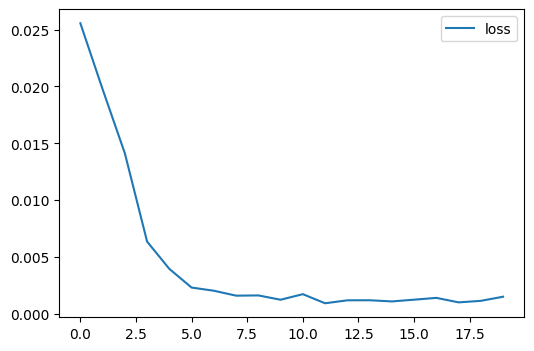

In [56]:
length = 12
batch_size=1

full_generator = TimeseriesGenerator(scaled_data, scaled_data, length=length, batch_size=batch_size)

full_model = Sequential()

full_model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
full_model.add(Dense(1))

full_model.compile(optimizer='adam', loss='mse')
full_model.fit(full_generator, epochs=20)

losses = pd.DataFrame(full_model.history.history)
losses.plot(figsize=(6,4))


In [ ]:

future_predictions = []
eval_batch = scaled_data[-length:]
current_batch = eval_batch.reshape((1,length, n_features))

for i in range(len(test)):
    current_pred = full_model.predict(current_batch)[0]
    future_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

future_predictions = scaler.inverse_transform(future_predictions)
#  = future_predictions

In [62]:
future_index = pd.date_range(start='2019-11-01', periods=18, freq="MS")
future_df = pd.DataFrame(data=future_predictions, index=future_index, columns=['future'])

<Axes: >

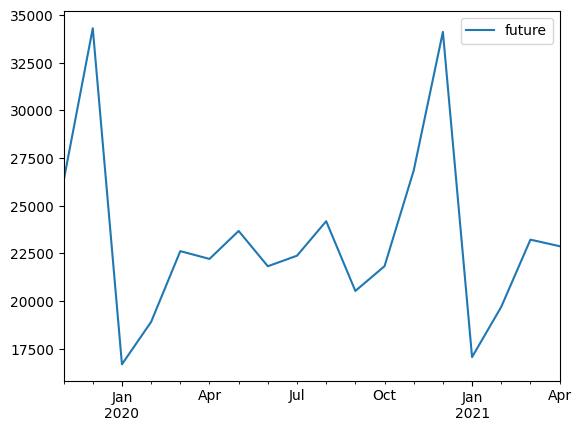

In [67]:
future_df.plot()

## Final Exercise

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


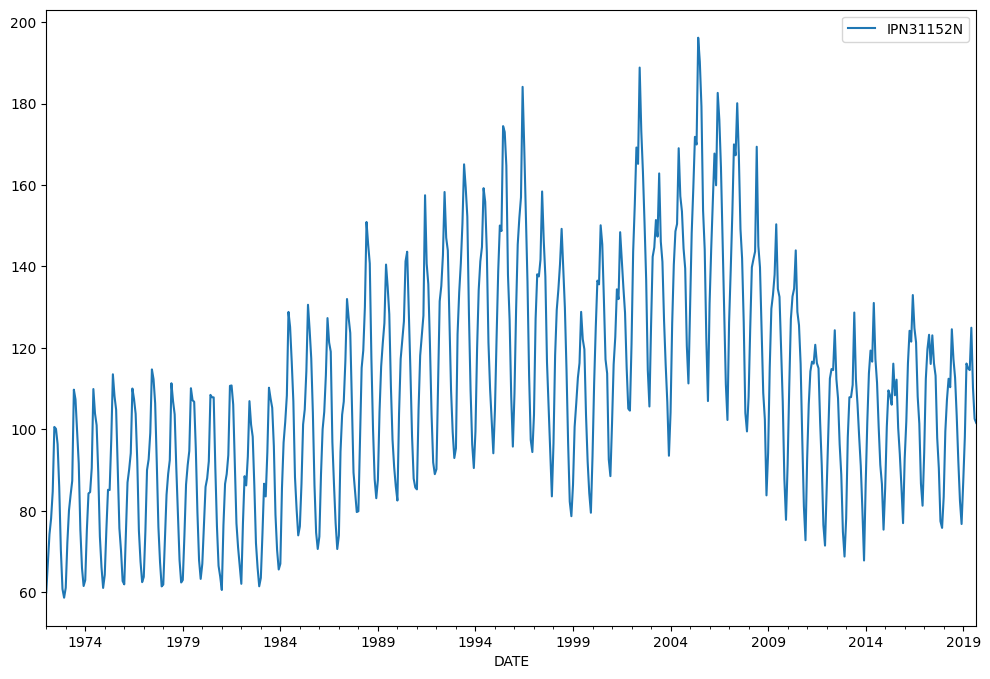

In [3]:
df = pd.read_csv("../DATA/Frozen_Dessert_Production.csv", index_col='DATE', parse_dates=True)
df.plot(figsize=(12,8))
df.head()

In [4]:
test_length = 24

train = df.iloc[:-test_length]
test = df.iloc[-test_length:]

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [6]:
batch_size = 1
length=18
generator = TimeseriesGenerator(scaled_train, scaled_train, batch_size=batch_size, length=length)
test_generator = TimeseriesGenerator(scaled_test, scaled_test, batch_size=batch_size, length=length)

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
final_model = Sequential()

final_model.add(LSTM(100, activation='relu', input_shape=(length, batch_size)))
final_model.add(Dense(1))

final_model.compile(optimizer='adam', loss='mse')
final_model.summary()

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
final_model.fit(generator, validation_data=test_generator, callbacks=[early_stop], epochs=20)

Epoch 1/20


 46/531 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0646

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0341 - val_loss: 0.0037
Epoch 2/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0120 - val_loss: 0.0019
Epoch 3/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0050 - val_loss: 0.0018
Epoch 4/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 5/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 6/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0029 - val_loss: 0.0020


,loss,val_loss
0,0.026999,0.003738
1,0.009931,0.001874
2,0.004492,0.001818
3,0.003575,0.002887
4,0.003132,0.002711


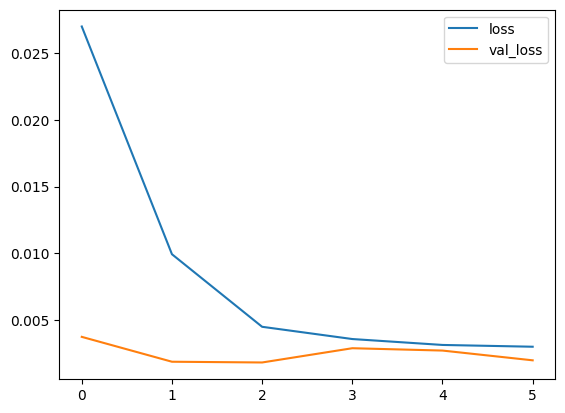

In [9]:
losses = pd.DataFrame(final_model.history.history)
losses.plot()
losses.head()

In [10]:
test_preds = []

eval_batch = scaled_train[-length:]
current_batch = eval_batch.reshape((1,length, batch_size))

for i in range(0, len(test)):
    prediction = final_model.predict(current_batch)[0]
    test_preds.append(prediction)
    current_batch = np.append(current_batch[:,1:,:], [[prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [11]:
test_preds = scaler.inverse_transform(test_preds)
test['new_preds'] = test_preds

/var/folders/ch/p1mwh9zs19d89x6b4nx5xqy00000gn/T/ipykernel_61090/2346637840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['new_preds'] = test_preds


<Axes: xlabel='DATE'>

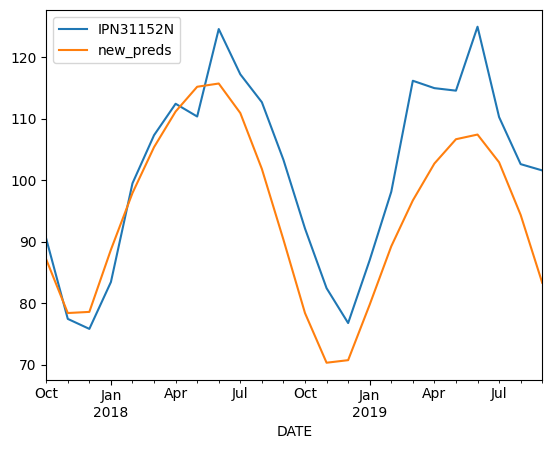

In [12]:
test.plot()